<a href="https://colab.research.google.com/github/AlexFeeney/Project4_Group3/blob/main/Kmeans_Prac_Himali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [133]:
import os
import pandas as pd

!pip install hvplot
import hvplot.pandas

from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#define spark version
spark_version = 'spark-3.5.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [134]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Demographics").getOrCreate()

In [135]:
#Read in the data from the group github repo
from pyspark import SparkFiles
url = "https://raw.githubusercontent.com/AlexFeeney/Project4_Group3/main/Data/healthcare-dataset-stroke-data.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("healthcare-dataset-stroke-data.csv"), sep=",", header=True)

# Show DataFrame
df.show()

+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender|age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+---+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male| 67|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female| 61|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male| 80|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female| 49|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female| 79|           1|            0|         Yes|Self

In [136]:
#convert to pandas df
pandas_df = df.toPandas()

In [137]:
pandas_df.dropna(axis=0, inplace=True)

In [138]:
pandas_df = pandas_df[pandas_df['bmi']!='N/A']

In [139]:
data_without_missing_values = pandas_df.dropna(axis=0)

In [140]:
data_without_missing_values

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.2,40,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [141]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as stl
stl.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [142]:
x = data_without_missing_values.drop(['stroke'], axis=1)

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
x

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.2,40,never smoked
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [145]:
# Multiple categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

x = pd.get_dummies(x, columns=categorical_cols, dtype=int)

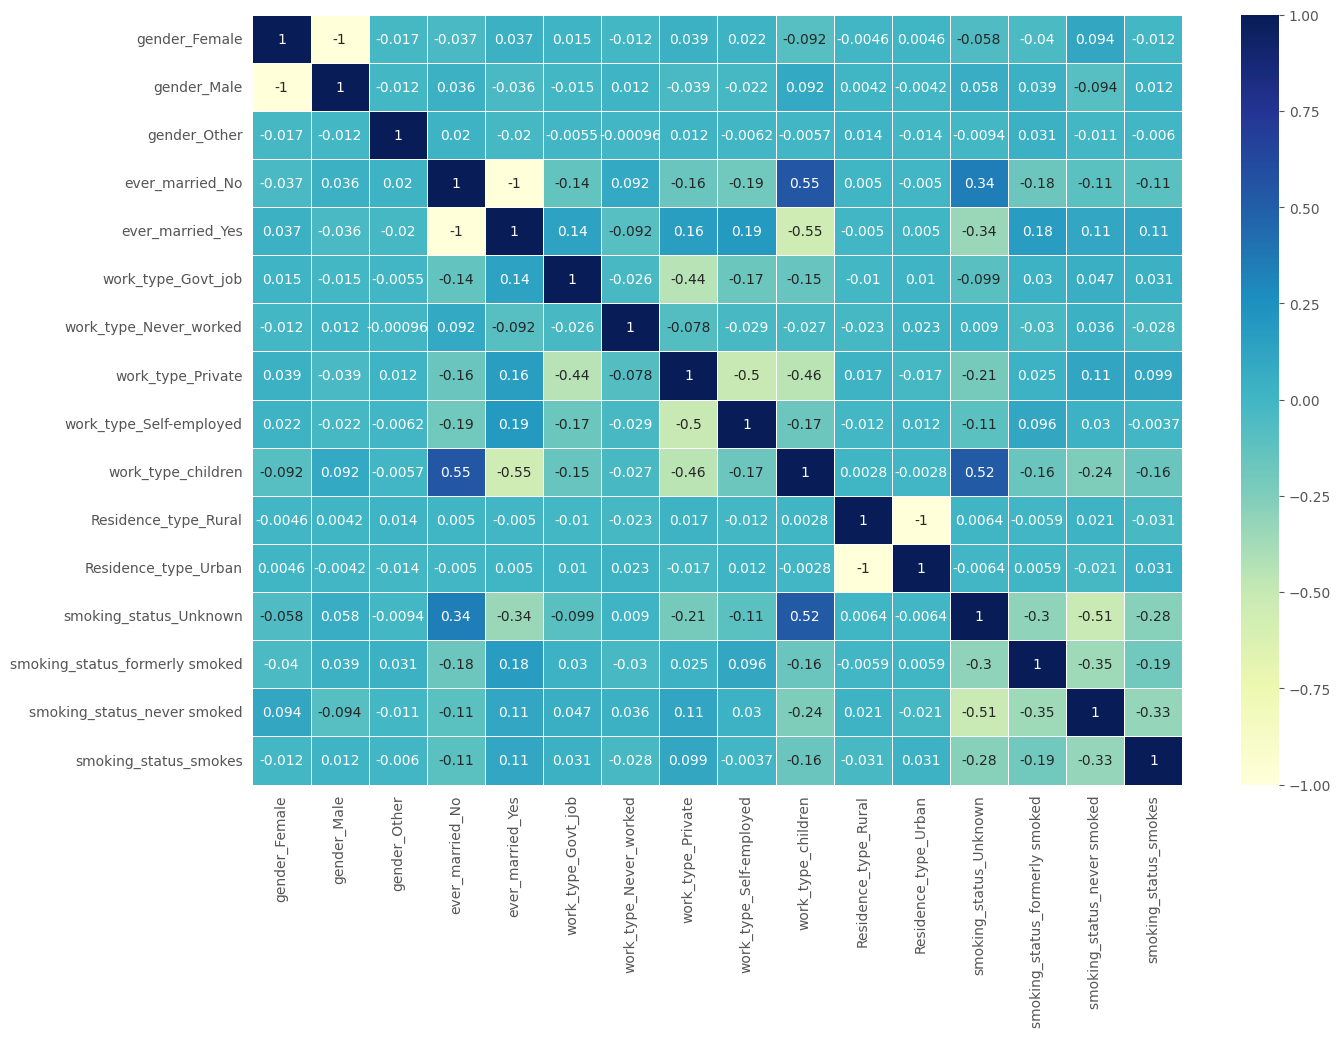

In [146]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(x.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax);


In [147]:
#x.drop(['bmi'], axis=1, inplace=True)
x.drop(['id'], axis=1, inplace=True)

In [148]:
x_try = x[['avg_glucose_level','bmi']]
x_try

,avg_glucose_level,bmi
0,228.69,36.6
2,105.92,32.5
3,171.23,34.4
4,174.12,24
5,186.21,29
...,...,...
5104,103.08,18.6
5106,125.2,40
5107,82.99,30.6
5108,166.29,25.6


In [149]:
x_try = x_try.astype(float)

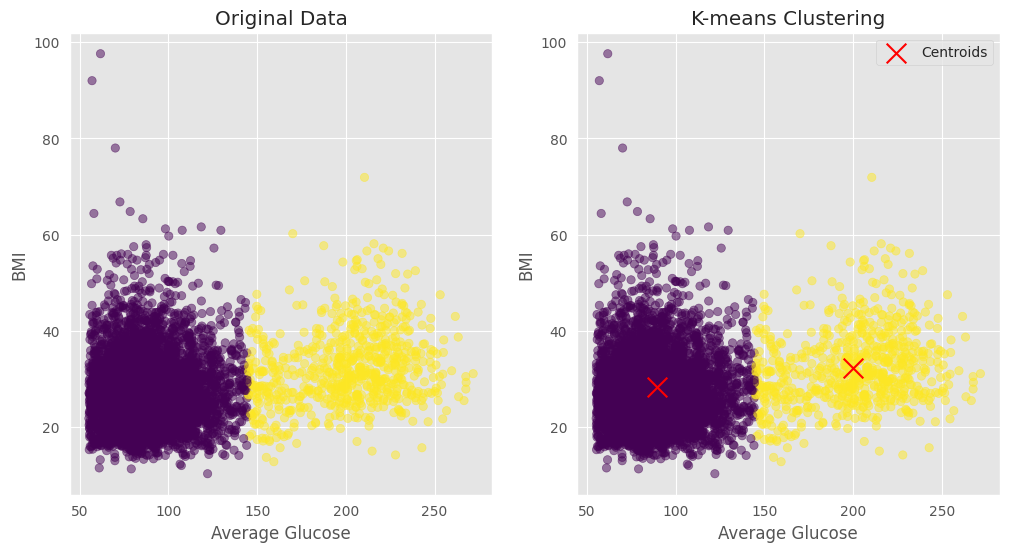

In [150]:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(x_try)

# Get cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_try.iloc[:, 0], x_try.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Average Glucose')
plt.ylabel('BMI')

# Plot the clustered data with centroids
plt.subplot(1, 2, 2)
plt.scatter(x_try.iloc[:, 0], x_try.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:,0], centroids[:, 1], marker='x', c='red', s=200, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Average Glucose')
plt.ylabel('BMI')
plt.legend()
plt.show()



In [151]:
print(centroids[:,0])
print(centroids[:,1])



[ 89.32097143 199.99280677]
[28.30861905 32.35641749]


In [152]:
pandas_df_try = pandas_df[['bmi', 'avg_glucose_level', 'stroke']]

pandas_df_try = pandas_df_try.astype(float)

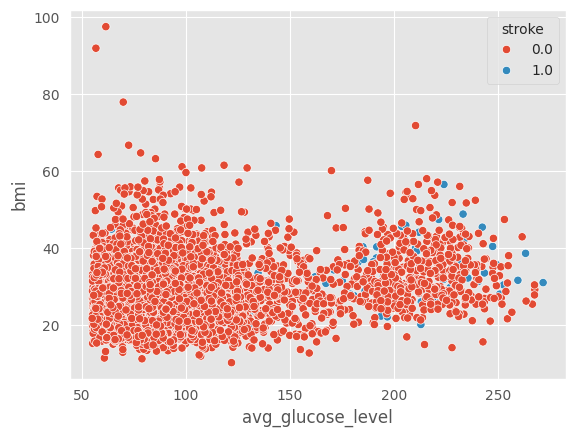

In [153]:
#plt.figure(figsize=(8,8))
sns.scatterplot(data = pandas_df_try, x = 'avg_glucose_level', y = 'bmi', hue='stroke')
ax.set_xticks(ax.get_xticks()[::2])
plt.show()

In [154]:
print(centroids)

[[ 89.32097143  28.30861905]
 [199.99280677  32.35641749]]


In [155]:
x.iloc[:,6]

0       1
2       1
3       0
4       0
5       1
       ..
5104    0
5106    0
5107    0
5108    1
5109    0
Name: gender_Male, Length: 4909, dtype: int64